In [2]:
import pandas as pd

PATH = "mistral_thirty_726_vs_ground_truth_726.csv"
df = pd.read_csv(PATH)

MEASURES = ["accuracy", "completeness", "relevance", "clarity"]

model_cols = [f"{m}_model" for m in MEASURES]
gt_cols    = [f"{m}_gt" for m in MEASURES]

# Ensure numeric comparison (prevents "4" vs 4.0 mismatches)
for c in model_cols + gt_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Per-measure matches
for m in MEASURES:
    df[f"match_{m}"] = df[f"{m}_model"] == df[f"{m}_gt"]

# Only evaluate rows where all 4 GT values exist
valid = df[gt_cols].notna().all(axis=1)

# All-4 strict accuracy
df["match_all_4"] = valid & df[[f"match_{m}" for m in MEASURES]].all(axis=1)

# ---- Metrics ----
print("Per-measure accuracy:")
for m in MEASURES:
    acc = df.loc[df[f"{m}_gt"].notna(), f"match_{m}"].mean()
    print(f"  {m:>12}: {acc:.2%}")

overall = df.loc[valid, "match_all_4"].mean()
print(f"\nOverall accuracy (ALL 4 must match): {overall:.2%}")
print(f"Rows evaluated: {valid.sum()} / {len(df)}")

# Optional: save detailed output
OUT = "mistral_thirty_726_accuracy_results.csv"
df.to_csv(OUT, index=False)
print("\nSaved detailed results to:", OUT)


Per-measure accuracy:
      accuracy: 60.24%
  completeness: 57.70%
     relevance: 47.23%
       clarity: 36.77%

Overall accuracy (ALL 4 must match): 21.38%
Rows evaluated: 669 / 726

Saved detailed results to: mistral_thirty_726_accuracy_results.csv


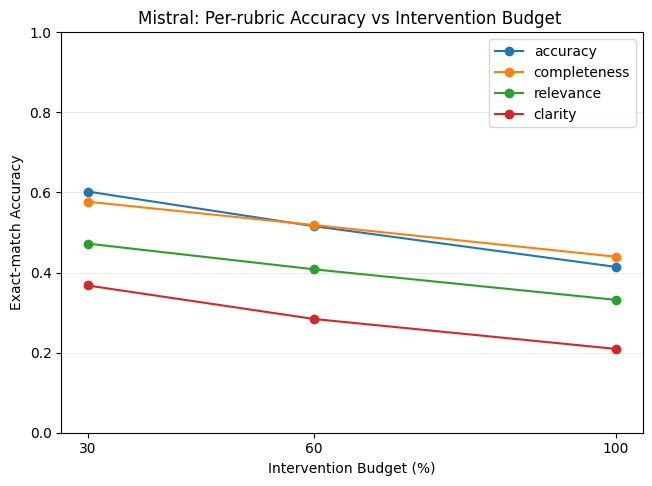

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# --------- FILE PATHS (Mistral, excluding zero) ----------
FILES = {
    30: "mistral_thirty_726_vs_ground_truth_726.csv",
    60: "mistral_sixty_726_vs_ground_truth_726.csv",
    100: "mistral_vs_ground_truth_aligned.csv",  # mistral_all (726 reference)
}

MEASURES = ["accuracy", "completeness", "relevance", "clarity"]

# --------- COMPUTE PER-RUBRIC ACCURACY ----------
x_vals = sorted(FILES.keys())
results = {m: [] for m in MEASURES}

for budget in x_vals:
    df = pd.read_csv(FILES[budget])
    
    for m in MEASURES:
        mc = f"{m}_model"
        gc = f"{m}_gt"
        
        df[mc] = pd.to_numeric(df[mc], errors="coerce")
        df[gc] = pd.to_numeric(df[gc], errors="coerce")
        
        valid = df[gc].notna()
        acc = (df.loc[valid, mc] == df.loc[valid, gc]).mean()
        results[m].append(acc)

# --------- PLOT ----------
plt.figure(figsize=(7.5, 5.2))

for m in MEASURES:
    plt.plot(x_vals, results[m], marker="o", label=m)

plt.xlabel("Intervention Budget (%)")
plt.ylabel("Exact-match Accuracy")
plt.title("Mistral: Per-rubric Accuracy vs Intervention Budget ")
plt.ylim(0, 1)
plt.xticks(x_vals)
plt.legend()
plt.grid(True, axis="y", linewidth=0.5, alpha=0.4)

plt.show()


In [ ]:
import pandas as pd

PATH = "mistral_sixty_726_vs_ground_truth_726.csv"
df = pd.read_csv(PATH)

MEASURES = ["accuracy", "completeness", "relevance", "clarity"]

model_cols = [f"{m}_model" for m in MEASURES]
gt_cols    = [f"{m}_gt" for m in MEASURES]

# Ensure numeric comparison (prevents "4" vs 4.0 mismatches)
for c in model_cols + gt_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Per-measure matches
for m in MEASURES:
    df[f"match_{m}"] = df[f"{m}_model"] == df[f"{m}_gt"]

# Only evaluate rows where all 4 GT values exist
valid = df[gt_cols].notna().all(axis=1)

# All-4 strict accuracy
df["match_all_4"] = valid & df[[f"match_{m}" for m in MEASURES]].all(axis=1)

# ---- Metrics ----
print("Per-measure accuracy:")
for m in MEASURES:
    acc = df.loc[df[f"{m}_gt"].notna(), f"match_{m}"].mean()
    print(f"  {m:>12}: {acc:.2%}")

overall = df.loc[valid, "match_all_4"].mean()
print(f"\nOverall accuracy (ALL 4 must match): {overall:.2%}")
print(f"Rows evaluated: {valid.sum()} / {len(df)}")

# Optional: save detailed output
OUT = "/mnt/data/mistral_thirty_726_accuracy_results.csv"
df.to_csv(OUT, index=False)
print("\nSaved detailed results to:", OUT)
